In [67]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from multiplication import Mult


sns.set_theme(
    font_scale=1.0,
    style='darkgrid',
    rc={'figure.figsize':(8, 6)}
)

In [95]:
def prepare_plot(ax, title, xmin=0-16, xmax=256+16, ymin=0-16, ymax=256+16, xspacing=32, yspacing=32):
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(xspacing))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(yspacing))

    # ax.set_clip_on(False)
    # # turn clipping off for all lines in the axes
    for line in ax.lines:
        line.set_clip_on(False)
        line.set_zorder(5)   # push data above spines if needed

In [3]:
def byte_to_signed(x):
    x = x & 0xFF
    if x >= 128:
        return x - 256
    return x

In [4]:
mult = Mult()

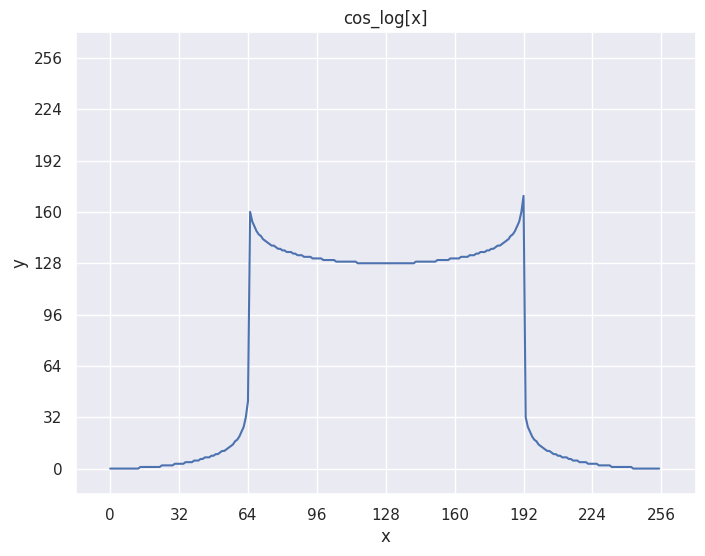

In [ ]:
prepare_plot(
    sns.lineplot([mult.cos_fixed_to_log(x) for x in range(0, 256)]),
    r'cos_log[x]'
)


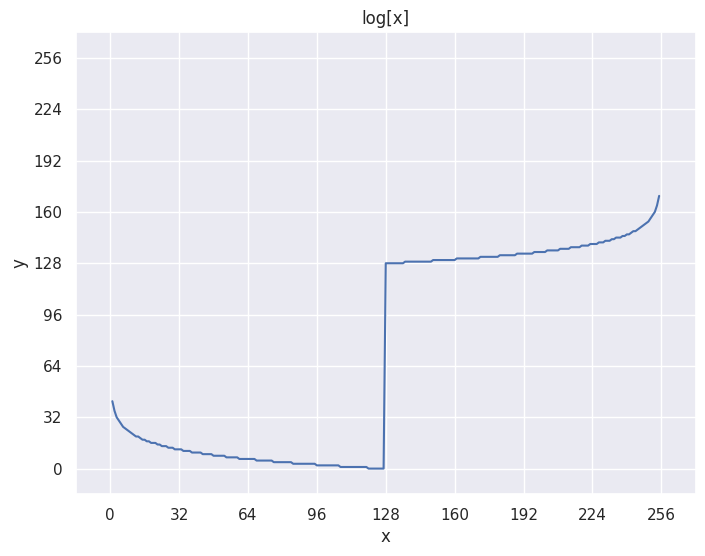

In [123]:
prepare_plot(
    sns.lineplot({x: mult.fixed_to_log(x) for x in range(1, 256)}),
    'log[x]'
    # r'$\text{encode} \left( \log_{2^{\frac{1}{6}}}( \text{decode}(x)) \right)$'
)

In [59]:
mult.log_to_fixed(0)

127

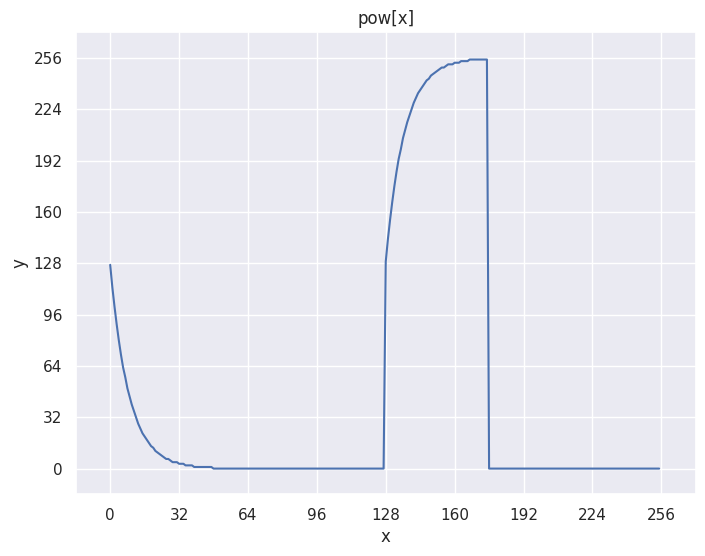

In [101]:


prepare_plot(
    sns.lineplot([mult.log_to_fixed(x) for x in range(0, 256)]),
    'pow[x]'
    # r'$\text{decode} \left( \left( 2^{\frac{1}{6}} \right) ^ {\text{encode}(x)} \right)$'
)

<Axes: title={'center': 'pow[log[x]]'}, xlabel='x', ylabel='y'>

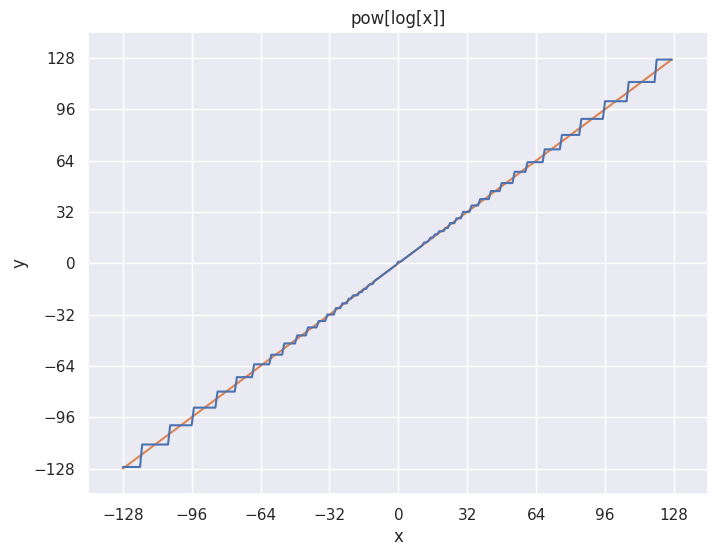

In [122]:

prepare_plot(
    sns.lineplot({x: byte_to_signed(mult.log_to_fixed(mult.fixed_to_log(x))) for x in range(-128,128)}),
    'pow[log[x]]',
    xmin=-128-16,
    ymin=-128-16,
    xmax=128+16,
    ymax=128+16,
)
sns.lineplot({x: x for x in range(-128, 128)})

<Axes: ylabel='Count'>

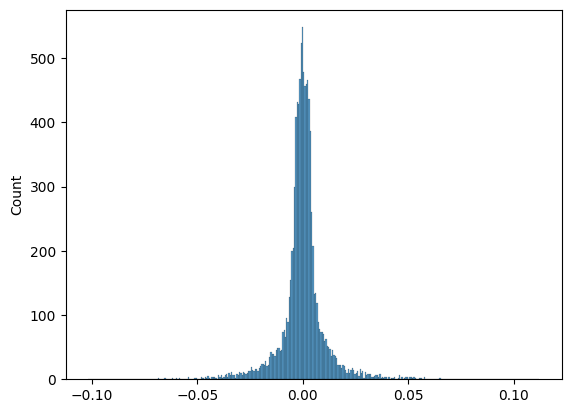

In [32]:
def test_mult():
    a = np.random.rand()*2-1
    b = np.random.rand()*2-1
    c = np.random.rand()*2-1

    expected = a * b * c

    actual = mult.log_to_float(mult.float_to_log(a) + mult.float_to_log(b) + mult.float_to_log(c))

    return actual - expected

sns.histplot([test_mult() for _ in range(10_000)])

<Axes: title={'center': 'float(pow[cos_log[x]])'}, xlabel='x', ylabel='y'>

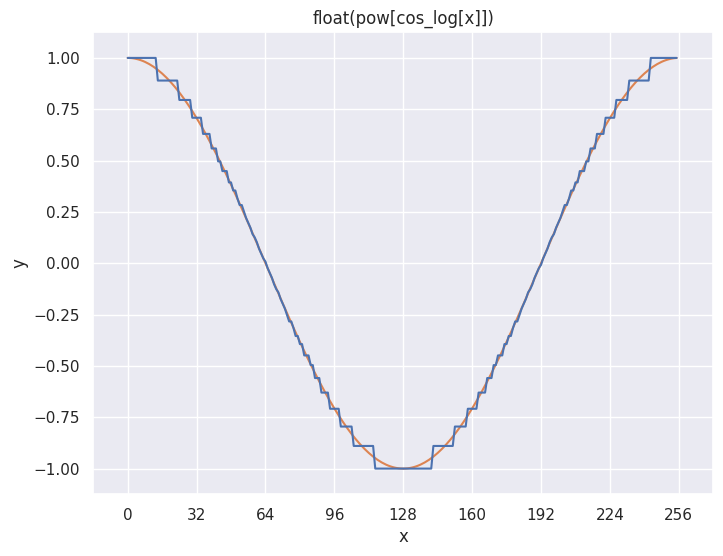

In [119]:
prepare_plot(
    sns.lineplot([mult.log_to_float(mult.cos_fixed_to_log(x)) for x in range(256)]),
    'float(pow[cos_log[x]])',
    ymin=-1 - 1/8,
    ymax=1 + 1/8,
    yspacing=1/4,
)
sns.lineplot([np.cos(x/256 * 2 * np.pi) for x in range(256)])

In [34]:
math.cos(1) * math.cos(1.5)

0.038219473171719504

In [42]:
print('COS_LOG_LOOKUP::')
print('db ' + (', '.join([str(mult.cos_fixed_to_log(x)) for x in range(256)])))

COS_LOG_LOOKUP::
db 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 11, 11, 12, 13, 14, 15, 17, 18, 20, 23, 26, 32, 42, 160, 154, 151, 148, 146, 145, 143, 142, 141, 140, 139, 139, 138, 137, 137, 136, 136, 135, 135, 135, 134, 134, 133, 133, 133, 132, 132, 132, 132, 131, 131, 131, 131, 131, 130, 130, 130, 130, 130, 130, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 132, 132, 132, 132, 133, 133, 133, 134, 134, 135, 135, 135, 136, 136, 137, 137, 138, 139, 139, 140, 141, 142, 143, 145, 146, 148, 151, 154, 160, 170, 32, 26, 23, 20, 18, 17, 15, 14, 13, 12, 11, 11, 10, 9, 9, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2

In [41]:
print('POW_LOOKUP::')
print('db ' + (', '.join([str(mult.log_to_fixed(x)) for x in range(256)])))

POW_LOOKUP::
db 127, 113, 101, 90, 80, 71, 63, 57, 50, 45, 40, 36, 32, 28, 25, 22, 20, 18, 16, 14, 13, 11, 10, 9, 8, 7, 6, 6, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 129, 143, 155, 166, 176, 185, 193, 199, 206, 211, 216, 220, 224, 228, 231, 234, 236, 238, 240, 242, 243, 245, 246, 247, 248, 249, 250, 250, 251, 252, 252, 252, 253, 253, 253, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


<Axes: ylabel='Count'>

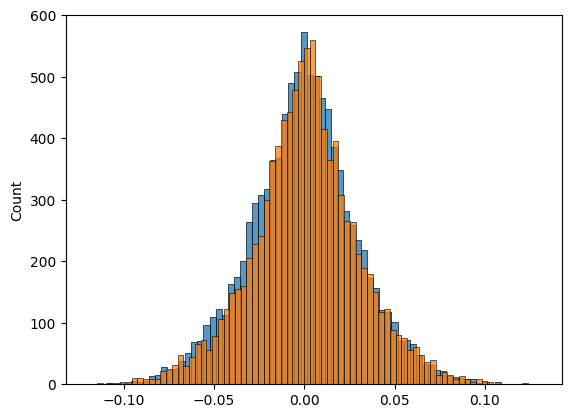

In [289]:
def random_normal():
    x = np.random.rand()*2 - 1
    y = np.random.rand()*2 - 1
    z = np.random.rand()*2 - 1

    l = (x**2 + y**2 + z**2)**0.5
    return np.array([x,y,z]) / l

def vector_to_spherical(x,y,z):
    theta = np.arccos(z / (x**2 + y**2 + z**2)**0.5)
    phi = np.arccos(x / (x**2 + y**2)**0.5) * (1 if y >= 0 else -1)
    return (theta, phi)

def spherical_as_fixed(theta, phi):
    theta = round(theta / (2 * np.pi) * 256) & 0xFF
    phi = round(phi / (2 * np.pi) * 256) & 0xFF
    return theta, phi

def float_vector_log(x,y,z):
    return (mult.float_to_log(x), mult.float_to_log(y), mult.float_to_log(z))

def test_regular_dot(theta=None, phi=None):
    if theta is None:
        theta = np.random.randint(256)
    if phi is None:
        phi = np.random.randint(256)

    # note: sin(x) = cos(x - pi/2)
    # in fixed units: sin(x) = cos(x - 64)
    def sinlog(x): return mult.cos_fixed_to_log(x - 64)
    def coslog(x): return mult.cos_fixed_to_log(x)
    def pow(x): return mult.log_to_float(x)

    theta_f = theta/256 * 2*np.pi
    phi_f = phi/256 * 2*np.pi

    Lx = np.sin(theta_f)*np.cos(phi_f)
    Ly = np.sin(theta_f)*np.sin(phi_f)
    Lz = np.cos(theta_f)

    Nx,Ny,Nz = random_normal()

    Lx_log = sinlog(theta) + coslog(phi)
    Ly_log = sinlog(theta) + sinlog(phi)
    Lz_log = coslog(theta)

    Nx_log,Ny_log,Nz_log = float_vector_log(Nx,Ny,Nz)

    expected_dot = Lx*Nx + Ly*Ny + Lz*Nz
    actual_dot = pow(Lx_log+Nx_log) + pow(Ly_log+Ny_log) + pow(Lz_log+Nz_log)

    return actual_dot - expected_dot

def test_spherical_dot():
    L_theta_fixed = np.random.randint(256)
    L_phi_fixed = np.random.randint(256)

    # note: sin(x) = cos(x - pi/2)
    # in fixed units: sin(x) = cos(x - 64)
    def sinlog(x): return mult.cos_fixed_to_log(x - 64)
    def coslog(x): return mult.cos_fixed_to_log(x)
    def pow(x): return mult.log_to_float(x)

    L_theta = L_theta_fixed/256 * 2*np.pi
    L_phi = L_phi_fixed/256 * 2*np.pi

    N_theta,N_phi = vector_to_spherical(*random_normal())

    sin_N_theta_log = mult.float_to_log(np.sin(N_theta))
    cos_N_theta_log = mult.float_to_log(np.cos(N_theta))

    N_phi_fixed = round(N_phi / (2*np.pi) * 256) & 0xFF

    # Computed at run-time
    sin_L_theta_log = sinlog(L_theta_fixed)
    cos_L_theta_log = coslog(L_theta_fixed)

    expected_dot = np.sin(N_theta)*np.sin(L_theta)*np.cos(N_phi - L_phi) + np.cos(N_theta)*np.cos(L_theta)
    actual_dot = pow(sin_N_theta_log + sin_L_theta_log + coslog(N_phi_fixed - L_phi_fixed)) + pow(cos_N_theta_log + cos_L_theta_log)

    return actual_dot - expected_dot


sns.histplot([test_regular_dot() for _ in range(10_000)])
sns.histplot([test_spherical_dot() for _ in range(10_000)])

<Axes: >

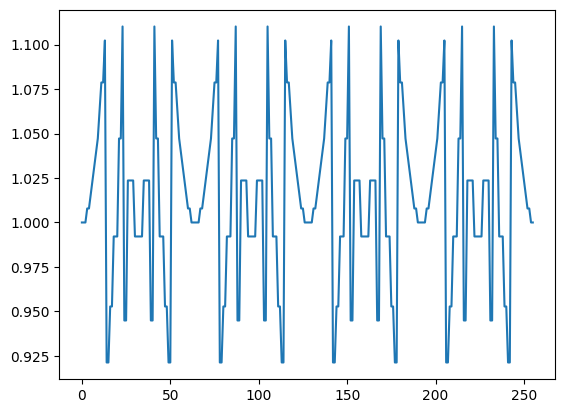

In [213]:
def sinlog(x): return mult.cos_fixed_to_log(x - 64)
def coslog(x): return mult.cos_fixed_to_log(x)
def pow(x): return mult.log_to_float(x)

sns.lineplot([pow(2*sinlog(x)) + pow(2*coslog(x)) for x in range(256)])